In [1]:
import os

In [2]:
%pwd

'c:\\Users\\DELL\\OneDrive\\Desktop\\MachineLearning\\face-extraction\\research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'c:\\Users\\DELL\\OneDrive\\Desktop\\MachineLearning\\face-extraction'

# 1. Face Detection

In [21]:
import cv2
import numpy as np

# Function to perform face detection using DNN model and save the detected face region
def detect_and_save_face(image_path, output_path):
    # Load pre-trained face detection model from OpenCV's DNN module
    prototxt_path = 'c:\\Users\\DELL\\OneDrive\\Desktop\\MachineLearning\\face-extraction\\models\\deploy.prototxt.txt'
    model_path = 'c:\\Users\\DELL\\OneDrive\\Desktop\\MachineLearning\\face-extraction\\models\\res10_300x300_ssd_iter_140000.caffemodel'
    net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)
    
    # Read the image
    image = cv2.imread(image_path)
    
    # Resize image to a fixed width and height and prepare it for face detection
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    
    # Pass the blob through the network and obtain the face detections
    net.setInput(blob)
    detections = net.forward()
    
    # Loop over the detections
    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        
        # Filter out weak detections by ensuring the confidence is greater than the minimum confidence
        if confidence > 0.5:
            # Compute the (x, y)-coordinates of the bounding box for the face
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            
            # Expand the bounding box by a certain number of pixels (e.g., 20 pixels)
            padding = 350  # Adjust this value based on your needs
            startX = max(0, startX - padding)
            startY = max(0, startY - padding)
            endX = min(w, endX + padding)
            endY = min(h, endY)
            
            # Crop the face region from the image
            face_region = image[startY:endY, startX:endX]
            
            # Save the cropped face region as a new image
            cv2.imwrite(output_path, face_region)
            print(f"Detected face saved as {output_path}")
            return True
    
    # If no face detected, return False
    print("No face detected in the image.")
    return False

# Path to your input image
image_path = 'c:\\Users\\DELL\\OneDrive\\Desktop\\MachineLearning\\face-extraction\\images\\input\\girl.jpg'

# Path to save the detected face region
output_path = 'c:\\Users\\DELL\\OneDrive\\Desktop\\MachineLearning\\face-extraction\\images\\output\\detected_face.png'

# Perform face detection and save the detected face region
if detect_and_save_face(image_path, output_path):
    print("Face detection and saving successful.")
else:
    print("Face detection failed.")

Detected face saved as c:\Users\DELL\OneDrive\Desktop\MachineLearning\face-extraction\images\output\detected_face.png
Face detection and saving successful.


# 2. Masking Bounding Box Face

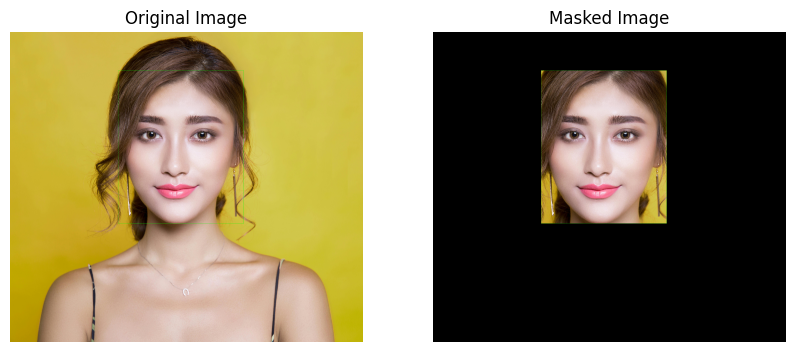

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to perform face detection using DNN model and draw mask on the detected face
def detect_and_draw_mask(image_path):
    # Load pre-trained face detection model from OpenCV's DNN module
    prototxt_path = 'c:\\Users\\DELL\\OneDrive\\Desktop\\MachineLearning\\face-extraction\\models\\deploy.prototxt.txt'
    model_path = 'c:\\Users\\DELL\\OneDrive\\Desktop\\MachineLearning\\face-extraction\\models\\res10_300x300_ssd_iter_140000.caffemodel'
    net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)
    
    # Read the image
    image = cv2.imread(image_path)
    
    # Resize image to a fixed width and height and prepare it for face detection
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    
    # Pass the blob through the network and obtain the face detections
    net.setInput(blob)
    detections = net.forward()
    
    # Loop over the detections
    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        
        # Filter out weak detections by ensuring the confidence is greater than the minimum confidence
        if confidence > 0.5:
            # Compute the (x, y)-coordinates of the bounding box for the face
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            
            # Expand the bounding box by a certain number of pixels (e.g., 80 pixels)
            padding = 150  # Adjust this value based on your needs
            startX = max(0, startX - padding)
            startY = max(0, startY - padding)
            endX = min(w, endX + padding)
            endY = min(h, endY)
            
            # Draw the expanded bounding box around the face
            cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
            
            # Create a mask image of the same size as the original image
            mask = np.zeros_like(image)
            
            # Draw filled rectangle on the mask image for the detected face region
            cv2.rectangle(mask, (startX, startY), (endX, endY), (255, 255, 255), -1)
            
            # Apply the mask to the original image using bitwise operation
            masked_image = cv2.bitwise_and(image, mask)
            
            # Convert BGR image to RGB for displaying in matplotlib
            masked_image_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)
            
            # Display the original image and masked image side by side using matplotlib
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title('Original Image')
            plt.axis('off')
            
            plt.subplot(1, 2, 2)
            plt.imshow(masked_image_rgb)
            plt.title('Masked Image')
            plt.axis('off')
            plt.show()

# Path to your input image
image_path = 'c:\\Users\\DELL\\OneDrive\\Desktop\\MachineLearning\\face-extraction\\images\\input\\girl.jpg'

# Perform face detection and draw mask on the detected face
detect_and_draw_mask(image_path)

# 3. Removing Background

In [23]:
from rembg import remove 
from PIL import Image 
  
# Store path of the image in the variable input_path 
input_path =  'c:\\Users\\DELL\\OneDrive\\Desktop\\MachineLearning\\face-extraction\\images\\output\\detected_face.png' 
  
# Store path of the output image in the variable output_path 
output_path = 'c:\\Users\\DELL\\OneDrive\\Desktop\\MachineLearning\\face-extraction\\images\\output\\transparent.png' 
  
# Processing the image 
input = Image.open(input_path) 
  
# Removing the background from the given Image 
output = remove(input) 
  
#Saving the image in the given path 
output.save(output_path) 

# 4. Removing Background Alternate

In [22]:
import rembg
from PIL import Image

def remove_background(input_image_path, output_image_path):
    with open(input_image_path, "rb") as input_file:
        input_image = rembg.remove(input_file.read())
        
    output_image = Image.open(input_image)
    output_image.save(output_image_path)

# Example usage
input_image_path = "detected_face.png"
output_image_path = "output_image.png"

remove_background(input_image_path, output_image_path)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte